# MSOAs

Data sources:
* [MSOA 2021 shapefile](https://geoportal.statistics.gov.uk/datasets/ons::middle-layer-super-output-areas-2021-boundaries-ew-bfc/explore) - This file contains MSOA boundaries for England and Wales as of 2021.
* [IMD 2019 MSOA-level data](https://research.mysociety.org/sites/imd2019/about/) - This file "was produced by the University of Sheffield, in collaboration with the Ministry of Housing, Communities and Local Government, and mySociety." It is provided as a free public resource by mySociety. The file "includes the House of Commons Library MSOA Names for each MSOA in England, as well as which region it is in, an LSOA count for each MSOA, in addition to the population-weighted MSOA score and corresponding national rank, from 1 (most deprived) to 6,791 (least deprived). We have also provided columns for decile (where 1 is most deprived, 10 least deprived) and quintile (where 1 is most deprived, 5 is least deprived)."

<mark>* IMD 2019 data: https://www.gov.uk/government/statistics/english-indices-of-deprivation-2019 delete</mark>

## Import packages and set file paths

In [1]:
from dataclasses import dataclass
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [2]:
# Define file paths
@dataclass(frozen=True)
class Paths:
    '''Paths to data'''

    data = './data'
    england_wales_shp = 'MSOA_2021_EW_BFC/MSOA_2021_EW_BFC_V6.shp'
    imd = 'imd2019_msoa_level_data.csv'


paths = Paths()

## Import shapefile and filter to the areas with #BeeWell survey data

Note: The full England and Wales shapefile is not provided on the GitHub repository due to filesize, but can be downloaded from the link above. <mark>could add zip version</mark>

In [3]:
# Import shapefile of England and Wales
shp_full = gpd.read_file(os.path.join(paths.data, paths.england_wales_shp))

In [4]:
def preview_gpd(df):
    '''
    Using the provided Geopandas dataframe, view the local authorities present,
    the head of the dataframe and a simple map of the data
    '''
    # List the local authorities present
    print(df['MSOA21NM'].str[:-4].sort_values().drop_duplicates())

    # Preview the dataframe
    display(df.head())

    # Create simple plot of the data
    fig, ax = plt.subplots()
    df.plot(ax=ax)
    ax.set_axis_off()

4000    North Devon
4052       Torridge
Name: MSOA21NM, dtype: object


,MSOA21CD,MSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
4000,E02004175,North Devon 001,253249,146186,-4.10168,51.1960,9db2606f-d157-4977-bc1c-9779a55ae5d1,"POLYGON ((254804.600 148598.700, 254813.300 14..."
4001,E02004176,North Devon 002,266976,146638,-3.90550,51.2034,439b9ea1-e4d9-4904-b1c0-f9a1d8d04408,"POLYGON ((275519.660 151187.050, 275518.060 15..."
4002,E02004177,North Devon 003,250974,146005,-4.13414,51.1938,6f7da272-6e2a-4a5f-b211-99afe33c7c22,"POLYGON ((251917.000 148047.000, 251913.000 14..."
4003,E02004178,North Devon 004,249373,141456,-4.15512,51.1525,f2163d7c-4ddd-4296-b2b7-eed7fb13d89a,"POLYGON ((246316.689 146903.165, 246325.212 14..."
4004,E02004179,North Devon 005,251236,135605,-4.12609,51.1004,f659f2bf-7823-41c4-a9b6-984dbef89dee,"POLYGON ((248309.172 139222.177, 248310.609 13..."


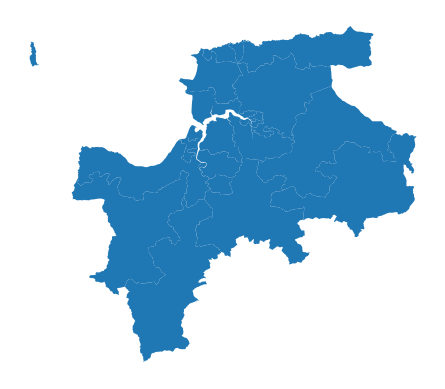

In [5]:
# Filter to MSOA in North Devon or Torridge
la_nd = 'North Devon|Torridge'
shp_nd = shp_full[shp_full['MSOA21NM'].str.contains(la_nd)]
preview_gpd(shp_nd)

932         Bolton
982           Bury
1032    Manchester
1065        Oldham
1094      Rochdale
1123       Salford
1158     Stockport
1194      Tameside
1222      Trafford
1256         Wigan
Name: MSOA21NM, dtype: object


,MSOA21CD,MSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
932,E02000984,Bolton 001,370496,414294,-2.44755,53.6244,82d9b947-be60-41bd-8b9e-79b51e0c35d4,"POLYGON ((371405.500 416301.312, 371471.156 41..."
933,E02000985,Bolton 002,373170,413001,-2.40701,53.6129,f27e68dc-9280-4071-81d9-7d512b6e0ba2,"POLYGON ((373358.406 414213.311, 373354.895 41..."
934,E02000986,Bolton 003,371724,412733,-2.42884,53.6104,4049a429-43d1-4653-bd79-68213eebb4d5,"POLYGON ((372353.774 413659.877, 372359.218 41..."
935,E02000987,Bolton 004,363867,411815,-2.54749,53.6017,16d4769e-1e1b-4aab-94c2-16ea6b706e37,"POLYGON ((364293.969 412767.300, 364319.730 41..."
936,E02000988,Bolton 005,371364,411523,-2.43417,53.5995,ded55317-dc2b-433d-a6cc-cf1f6d38dc0a,"POLYGON ((370954.000 412542.000, 370972.794 41..."


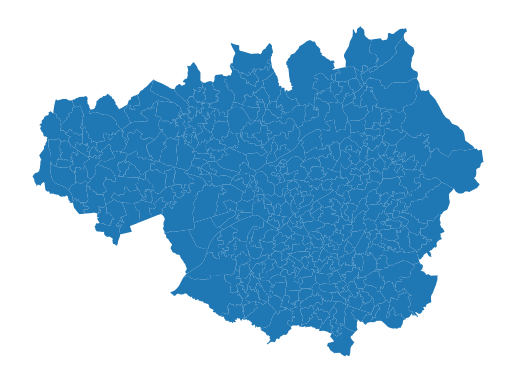

In [6]:
# Filter to MSOA in Greater Manchester
la_gm = ('Bolton|Bury|Manchester|Oldham|Rochdale|Salford|Stockport|' +
         'Trafford|Wigan|Tameside')
shp_gm = shp_full[shp_full['MSOA21NM'].str.contains(la_gm)]
preview_gpd(shp_gm)

4491    Basingstoke and Deane
4512           East Hampshire
4535                Eastleigh
4553                  Fareham
4557                  Gosport
4570                     Hart
4586                   Havant
3435            Isle of Wight
4611               New Forest
6718               Portsmouth
4615                 Rushmoor
6813              Southampton
6815              Test Valley
4651               Winchester
Name: MSOA21NM, dtype: object


,MSOA21CD,MSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
3370,E02003524,Portsmouth 001,463726,106331,-1.09606,50.8530,b6b6f7f7-6629-4fc7-b391-7b4e7b6a10eb,"POLYGON ((464314.563 106799.789, 464379.992 10..."
3371,E02003525,Portsmouth 002,465172,105904,-1.07559,50.8490,bf9cffb8-2b2e-4a86-b645-77121374ace8,"POLYGON ((465128.903 106733.811, 465159.188 10..."
3372,E02003526,Portsmouth 003,466581,106095,-1.05555,50.8505,11f2351b-6719-4260-b81a-905a031af16b,"POLYGON ((465694.708 106937.791, 465695.689 10..."
3373,E02003527,Portsmouth 004,464176,104420,-1.09000,50.8358,56853824-d109-4b2a-98f3-80cf96ef0563,"MULTIPOLYGON (((462551.375 104750.024, 462551...."
3374,E02003529,Portsmouth 006,466420,104928,-1.05804,50.8401,fe96c309-93dd-4080-ab77-3631a308e09c,"POLYGON ((465862.524 105735.777, 465880.194 10..."


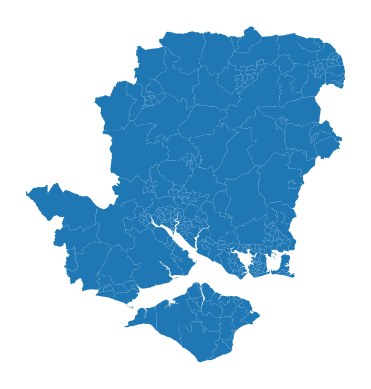

In [7]:
# Filter to MSOA in HIPS
la_hips = ('Basingstoke and Deane|East Hampshire|Eastleigh|Fareham|Gosport|' +
           'Hart|Havant|Isle of Wight|New Forest|Portsmouth|Rushmoor|' + 
           'Southampton|Test Valley|Winchester')
shp_hips = shp_full[shp_full['MSOA21NM'].str.contains(la_hips)]
shp_hips = shp_hips[~shp_hips['MSOA21NM'].str.contains('Hartlepool')]
preview_gpd(shp_hips)

435    Havering
Name: MSOA21NM, dtype: object


,MSOA21CD,MSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
435,E02000464,Havering 001,554309,193348,0.227508,51.6178,4530c12a-0328-4f3d-8963-7e3a77888bab,"POLYGON ((554598.386 194403.709, 554639.486 19..."
436,E02000465,Havering 002,555391,192167,0.242600,51.6069,22a215e3-ecf6-4990-b2af-4b084499a58a,"POLYGON ((556189.313 193227.156, 556239.375 19..."
437,E02000466,Havering 003,551434,192863,0.185806,51.6142,b5f99837-9a28-421b-891e-a2fc52583c83,"POLYGON ((552150.361 194117.701, 552095.572 19..."
438,E02000467,Havering 004,553771,191778,0.219055,51.6039,e9db656b-2cf6-4fc4-9be3-f1191af21785,"POLYGON ((553652.282 192541.389, 553676.910 19..."
439,E02000468,Havering 005,549369,192393,0.155803,51.6106,dfcdd490-b774-4acc-86e1-cf9e58b59669,"POLYGON ((549376.313 193808.000, 549423.376 19..."


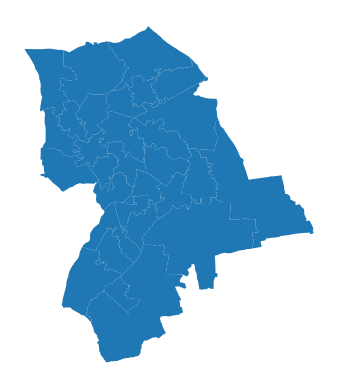

In [8]:
# Filter to MSOA in Havering
la_hav = 'Havering'
shp_hav = shp_full[shp_full['MSOA21NM'].str.contains(la_hav)]
preview_gpd(shp_hav)

## Merge the shapefiles into a single geopandas dataframe

In [9]:
shp_beewell = pd.concat([shp_nd, shp_gm, shp_hips, shp_hav])
shp_beewell.shape

(653, 8)

In [10]:
# Join the local authority strings
la_beewell = '|'.join([la_nd, la_gm, la_hips, la_hav])

# Create a list version
la_beewell_list = la_beewell.split('|')
la_beewell_list

['North Devon',
 'Torridge',
 'Bolton',
 'Bury',
 'Manchester',
 'Oldham',
 'Rochdale',
 'Salford',
 'Stockport',
 'Trafford',
 'Wigan',
 'Tameside',
 'Basingstoke and Deane',
 'East Hampshire',
 'Eastleigh',
 'Fareham',
 'Gosport',
 'Hart',
 'Havant',
 'Isle of Wight',
 'New Forest',
 'Portsmouth',
 'Rushmoor',
 'Southampton',
 'Test Valley',
 'Winchester',
 'Havering']

## Import IMD 2019 MSOA-level data

In [11]:
imd = pd.read_csv(os.path.join(paths.data, paths.imd))
imd.head()

,MSOAC,MSOAHOCLN,LAD19C,LAD19N,REG,LSOACOUNT,POPMID15,IMD19 SCORE,MSOARANK,MSOADECILE,MSOAQUINTILE
0,E02000001,City of London,E09000001,City of London,London,6,6687,14.720484,4198,7,4
1,E02000002,Marks Gate,E09000002,Barking and Dagenham,London,4,7379,34.767560,1060,2,1
2,E02000003,Chadwell Heath East,E09000002,Barking and Dagenham,London,6,10720,25.149726,2200,4,2
3,E02000004,Eastbrookend,E09000002,Barking and Dagenham,London,4,6536,23.560044,2429,4,2
4,E02000005,Becontree Heath,E09000002,Barking and Dagenham,London,5,9243,30.212965,1519,3,2


In [12]:
# Filter to local authorities with #BeeWell survey
imd_beewell = imd[imd['LAD19N'].isin(la_beewell_list)]

# Preview head of the dataframe
display(imd_beewell.head())

# Print the list of local authorities that those LSOA are part of
imd_beewell['LAD19N'].drop_duplicates().sort_values()

,MSOAC,MSOAHOCLN,LAD19C,LAD19N,REG,LSOACOUNT,POPMID15,IMD19 SCORE,MSOARANK,MSOADECILE,MSOAQUINTILE
445,E02000464,Dagnam Park & Noak Hill,E09000016,Havering,London,4,7113,28.932727,1665,3,2
446,E02000465,Petersfield Avenue & Duck Wood,E09000016,Havering,London,5,8635,28.406430,1733,3,2
447,E02000466,Havering-atte-Bower & Chase Cross,E09000016,Havering,London,5,8568,23.824340,2393,4,2
448,E02000467,Harold Hill East,E09000016,Havering,London,6,10433,39.521002,743,2,1
449,E02000468,Collier Row & Park Farm,E09000016,Havering,London,5,8105,19.320321,3174,5,3


4571    Basingstoke and Deane
951                    Bolton
986                      Bury
4593           East Hampshire
4606                Eastleigh
4621                  Fareham
4635                  Gosport
4645                     Hart
4656                   Havant
445                  Havering
3490            Isle of Wight
1012               Manchester
4670               New Forest
4074              North Devon
1062                   Oldham
3434               Portsmouth
1094                 Rochdale
4693                 Rushmoor
1119                  Salford
3458              Southampton
1149                Stockport
1191                 Tameside
4705              Test Valley
4119                 Torridge
1221                 Trafford
1249                    Wigan
4720               Winchester
Name: LAD19N, dtype: object